# I] Import and options


In [2]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [5]:
path = "mefs/mefs_western_blot/autophagy/"

# II] DL data

## A) Vala's paper - not ATG7(2)

In [6]:
data = "wb1_", "wb2_", "wb3_"
conditions = 'dmso', 'baf'
dfs_normalized = []
for condition in conditions:
    for wb in data:
        file_n = wb+condition+".csv"
        df = pandas.read_csv(input_file_directory + path + file_n, sep = ";") #download
        print(df, '\n')
        df = df.T #transpose
        df.columns = df.loc['proteins'] #select head of columns
        df.columns.name = None #remove name of index column
        df = df.drop(df.index[0:2])
        #normalized columns
        df = df.assign(flag_actin = df['flag']/ df['actin'],
                       p62_actin= df['p62']/ df['actin'],
                       lc3_actin= df['lc3']/ df['actin']) 
        df = df.iloc[:,4:] #select normalized columns
        df.reset_index(inplace = True)
        #select norm_ev_wt1_mut1 (remove iso2)
        df = df[(df['index'] == 'MEF') | (df['index'] == 'EV') | 
                (df['index'] == 'WT1') | (df['index'] == 'dVSR1')] 
        df = df.replace({'index' : {'MEF':'MEF WT','EV':'ATG7-/-','WT1':'ATG7','dVSR1':'dVSR'}})
        dfs_normalized.append(df)

wbs_dmso = pandas.concat([dfs_normalized[0], dfs_normalized[1], dfs_normalized[2]], axis=0)
wbs_baf = pandas.concat([dfs_normalized[3], dfs_normalized[4], dfs_normalized[5]], axis=0)
wbs_dmso

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     0    actin  20571418  28367832  27610004  33498246  31388518  35179539
1     0     flag   3713598   3713598  17355447  32148196  14710397  32205368
2     0      p62   7086841  16363640   9175518  24157539  13905589  19385832
3     0      lc3  41513794   4172518  54060856   4472518   4772518   4672518 

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     3    actin  26213296  25451832  19056154  23616832  17341640  20892933
1     3     flag   1227991   2165083  22842518  28240731  10444690  12747397
2     3      p62  10984882  26086125  12235347  21836196  15100518  11080811
3     3      lc3  31245924  17369811  25792146  14607631   2735376   1645607 

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     5    actin  38121146  38474024  43807803  50889246  43419660  54711217
1     5     flag   6168761   8564933  37940439  47406024  25009761  2851

,index,flag_actin,p62_actin,lc3_actin
0,MEF WT,0.180522,0.344499,2.018033
1,ATG7-/-,0.130909,0.576838,0.147086
2,ATG7,0.628593,0.332326,1.958017
3,dVSR,0.959698,0.721158,0.133515
0,MEF WT,0.046846,0.419058,1.191988
1,ATG7-/-,0.085066,1.024921,0.682458
2,ATG7,1.198695,0.642068,1.353481
3,dVSR,1.195788,0.924603,0.618526
0,MEF WT,0.16182,0.359592,1.31444
1,ATG7-/-,0.222616,0.657405,0.467422


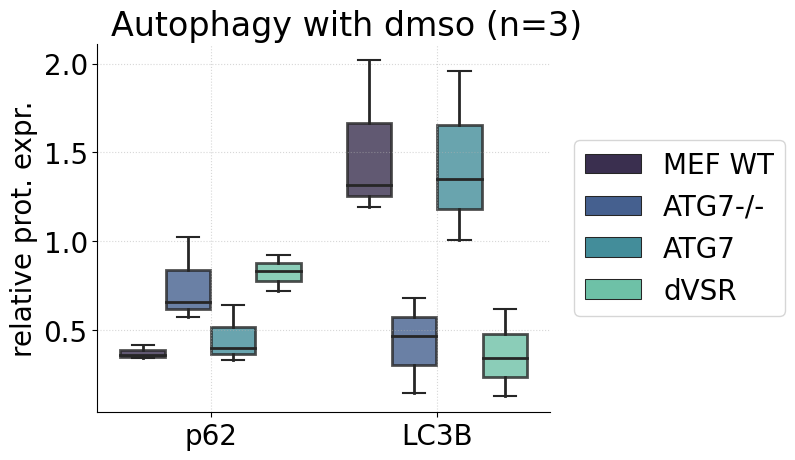

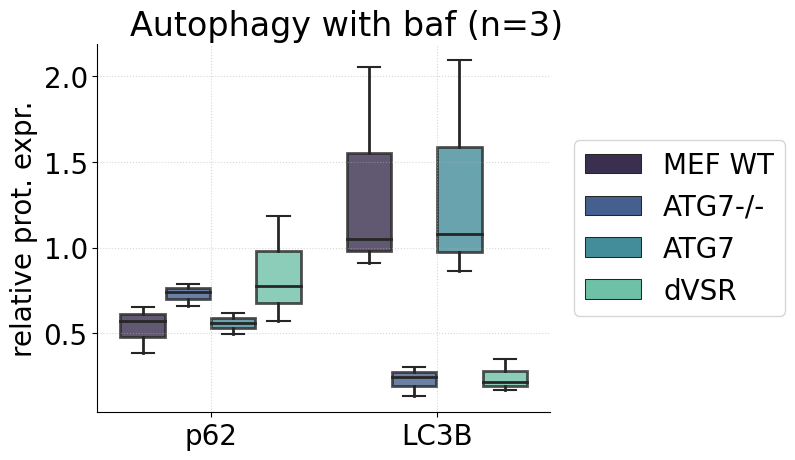

In [7]:
# Distribution: Data preparation + graph
dfs = wbs_dmso, wbs_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]

    #from wide to long dataframe
    df = df[['index', 'p62_actin', 'lc3_actin']]
    df = df.rename(columns = {'p62_actin':'p62','lc3_actin':'LC3B'})
    df = df.melt(id_vars=["index"], var_name="proteins")

    #graph
    seaborn.catplot(x="proteins", y="value", hue="index", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

    #save
    path2 = 'ATG7/MEF/Western_blot/'
    plt.savefig(output_file_directory+path2+'ATG7_autophagy_VSR'+Info+'.svg')

In [9]:
#Statistics T-test for the means of two independent samples
dfs = wbs_dmso, wbs_baf
proteins = 'p62_actin', 'lc3_actin'
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]
           
    # Stats of all compare to MEF WT
    df_stats = df.sort_values(['index'], ascending = True)
    df_stats.reset_index(drop=True, inplace=True)
        
    atg7_label = df_stats.iloc[0]['index']
    ev_label = df_stats.loc[3]['index']
    control_label = df_stats.iloc[6]['index']
    dvsr_label = df_stats.loc[9]['index']
    
    df_atg7 = df_stats.iloc[0:3, :]
    df_ev = df_stats.iloc[3:6, :]
    df_control = df_stats.iloc[6:9, :]
    df_dvsr = df_stats.iloc[9:, :]
    
    print(Info.upper())
    for protein in proteins:
        print(protein.upper())
        ###ATG7-/-
        statistic, pvalue = scipy.stats.ttest_ind(df_ev[protein], df_control[protein])
        print("the pvalue between", ev_label, "and", control_label,"is", "{:.5E}".format(pvalue))
        ###ATG7
        statistic, pvalue = scipy.stats.ttest_ind(df_atg7[protein], df_control[protein])
        print("the pvalue between", atg7_label, "and", control_label,"is", "{:.5E}".format(pvalue))
        ###delVSR
        statistic, pvalue = scipy.stats.ttest_ind(df_dvsr[protein], df_control[protein])
        print("the pvalue between", dvsr_label, "and", control_label,"is", "{:.5E}".format(pvalue))
    print('\n')

DMSO
P62_ACTIN


ValueError: data type <class 'numpy.object_'> not inexact

In [8]:
df_stats

,index,flag_actin,p62_actin,lc3_actin
0,ATG7,0.829084,0.62078,2.09414
1,ATG7,1.00595,0.496623,0.866885
2,ATG7,1.01837,0.562074,1.08098
3,ATG7-/-,0.0302628,0.742239,0.13709
4,ATG7-/-,0.00671147,0.790144,0.302387
5,ATG7-/-,0.29883,0.661142,0.242765
6,MEF WT,0.00538322,0.575041,2.05429
7,MEF WT,0.0668049,0.653167,1.0537
8,MEF WT,0.190587,0.385498,0.909869
9,dVSR,1.0998,1.18669,0.215755


## B) My paper - not delVSR

In [10]:
data = "wb1_", "wb2_", "wb3_"
conditions = 'dmso', 'baf'
dfs_normalized = []
for condition in conditions:
    for wb in data:
        file_n = wb+condition+".csv"
        df = pandas.read_csv(input_file_directory + path + file_n, sep = ";") #download
        print(df, '\n')
        
        df = df.T #transpose
        df.columns = df.loc['proteins'] #select head of columns
        df.columns.name = None #remove name of index column
        df = df.drop(df.index[0:2])
        #normalized columns
        df = df.assign(flag_actin = df['flag']/ df['actin'],
                       p62_actin= df['p62']/ df['actin'],
                       lc3_actin= df['lc3']/ df['actin']) 
        df = df.iloc[:,4:] #select normalized columns
        df.reset_index(inplace = True)
        #select norm_ev_wt1_mut1 (remove iso2)
        df = df[(df['index'] == 'MEF') | (df['index'] == 'EV') | 
                (df['index'] == 'WT1') | (df['index'] == 'WT2')] 
        df = df.replace({'index' : {'MEF':'MEF WT','EV':'ATG7-/-','WT1':'ATG7(1)','WT2':'ATG7(2)'}})
        dfs_normalized.append(df)

wbs_dmso = pandas.concat([dfs_normalized[0], dfs_normalized[1], dfs_normalized[2]], axis=0)
wbs_baf = pandas.concat([dfs_normalized[3], dfs_normalized[4], dfs_normalized[5]], axis=0)
wbs_dmso

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     0    actin  20571418  28367832  27610004  33498246  31388518  35179539
1     0     flag   3713598   3713598  17355447  32148196  14710397  32205368
2     0      p62   7086841  16363640   9175518  24157539  13905589  19385832
3     0      lc3  41513794   4172518  54060856   4472518   4772518   4672518 

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     3    actin  26213296  25451832  19056154  23616832  17341640  20892933
1     3     flag   1227991   2165083  22842518  28240731  10444690  12747397
2     3      p62  10984882  26086125  12235347  21836196  15100518  11080811
3     3      lc3  31245924  17369811  25792146  14607631   2735376   1645607 

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     5    actin  38121146  38474024  43807803  50889246  43419660  54711217
1     5     flag   6168761   8564933  37940439  47406024  25009761  2851

,index,flag_actin,p62_actin,lc3_actin
0,MEF WT,0.180522,0.344499,2.018033
1,ATG7-/-,0.130909,0.576838,0.147086
2,ATG7(1),0.628593,0.332326,1.958017
4,ATG7(2),0.468655,0.443015,0.152047
0,MEF WT,0.046846,0.419058,1.191988
1,ATG7-/-,0.085066,1.024921,0.682458
2,ATG7(1),1.198695,0.642068,1.353481
4,ATG7(2),0.60229,0.870766,0.157735
0,MEF WT,0.16182,0.359592,1.31444
1,ATG7-/-,0.222616,0.657405,0.467422


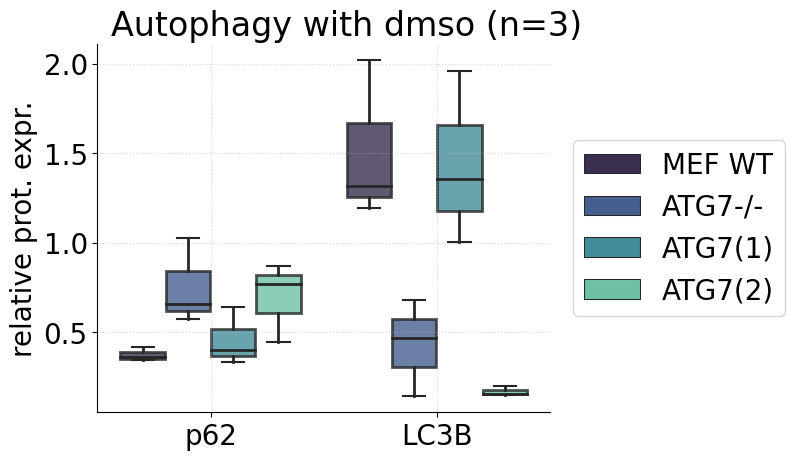

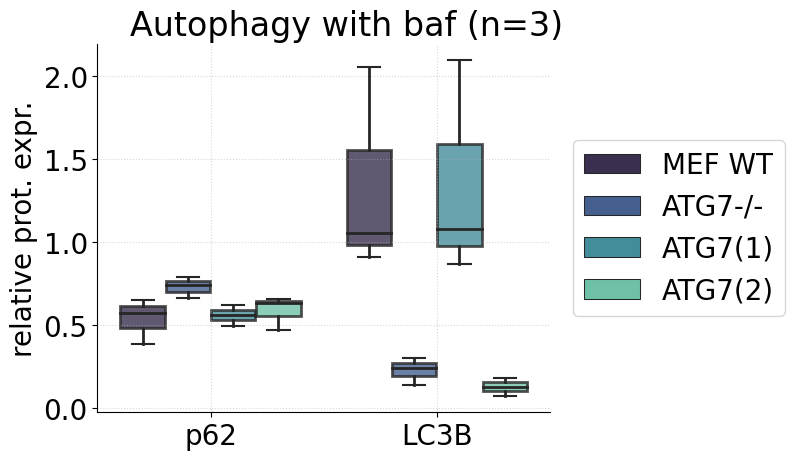

In [11]:
# Distribution: Data preparation + graph
dfs = wbs_dmso, wbs_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]

    #from wide to long dataframe
    df = df[['index', 'p62_actin', 'lc3_actin']]
    df = df.rename(columns = {'p62_actin':'p62','lc3_actin':'LC3B'})
    df = df.melt(id_vars=["index"], var_name="proteins")

    #graph
    seaborn.catplot(x="proteins", y="value", hue="index", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

    #save
    path2 = 'ATG7/MEF/Western_blot/'
    plt.savefig(output_file_directory+path2+'ATG7_autophagy_ISOF'+Info+'.svg')

In [22]:
#Statistics T-test for the means of two independent samples
dfs = wbs_dmso, wbs_baf
proteins = 'p62_actin', 'lc3_actin'
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]
           
    # Stats of all compare to MEF WT
    df_stats = df.sort_values(['index'], ascending = True)
    df_stats.reset_index(drop=True, inplace=True)
        
    iso1_label = df_stats.iloc[0]['index']
    iso2_label = df_stats.loc[3]['index']
    ev_label = df_stats.iloc[6]['index']
    control_label = df_stats.loc[9]['index']
   
    df_iso1 = df_stats.iloc[0:3, 1:].astype(float)
    df_iso2 = df_stats.iloc[3:6, 1:].astype(float)
    df_ev = df_stats.iloc[6:9, 1:].astype(float)
    df_control = df_stats.iloc[9:, 1:].astype(float)
    
    print(Info.upper())
    for protein in proteins:
        print(protein.upper())
        ### ATG7-/-
        statistic, pvalue = scipy.stats.ttest_ind(df_ev[protein], df_control[protein])
        print("the pvalue between", ev_label, "and", control_label,"is", "{:.5E}".format(pvalue))
        ### ATG7(1)
        statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_control[protein])
        print("the pvalue between", iso1_label, "and", control_label,"is", "{:.5E}".format(pvalue))
        ### ATG7(2)
        statistic, pvalue = scipy.stats.ttest_ind(df_iso2[protein], df_control[protein])
        print("the pvalue between", iso2_label, "and", control_label,"is", "{:.5E}".format(pvalue))
        
        ### ATG7(1) vs ATG7(2)
        statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_iso2[protein])
        print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
    print('\n')

DMSO
P62_ACTIN
the pvalue between ATG7-/- and MEF WT is 5.35831E-02
the pvalue between ATG7(1) and MEF WT is 4.35830E-01
the pvalue between ATG7(2) and MEF WT is 7.10297E-02
the pvalue between ATG7(1) and ATG7(2) is 2.12855E-01
LC3_ACTIN
the pvalue between ATG7-/- and MEF WT is 2.32210E-02
the pvalue between ATG7(1) and MEF WT is 8.64023E-01
the pvalue between ATG7(2) and MEF WT is 6.57615E-03
the pvalue between ATG7(1) and ATG7(2) is 1.04208E-02


BAF
P62_ACTIN
the pvalue between ATG7-/- and MEF WT is 9.28725E-02
the pvalue between ATG7(1) and MEF WT is 8.13848E-01
the pvalue between ATG7(2) and MEF WT is 6.39958E-01
the pvalue between ATG7(1) and ATG7(2) is 7.05002E-01
LC3_ACTIN
the pvalue between ATG7-/- and MEF WT is 3.75898E-02
the pvalue between ATG7(1) and MEF WT is 9.88441E-01
the pvalue between ATG7(2) and MEF WT is 2.84802E-02
the pvalue between ATG7(1) and ATG7(2) is 3.25567E-02




In [18]:
df_stats

,index,flag_actin,p62_actin,lc3_actin
0,ATG7(1),0.628593,0.332326,1.958017
1,ATG7(1),1.198695,0.642068,1.353481
2,ATG7(1),0.866066,0.39983,1.005349
3,ATG7(2),0.468655,0.443015,0.152047
4,ATG7(2),0.60229,0.870766,0.157735
5,ATG7(2),0.576001,0.769772,0.202264
6,ATG7-/-,0.130909,0.576838,0.147086
7,ATG7-/-,0.085066,1.024921,0.682458
8,ATG7-/-,0.222616,0.657405,0.467422
9,MEF WT,0.180522,0.344499,2.018033


In [12]:
df_stats

,index,flag_actin,p62_actin,lc3_actin
0,ATG7(1),0.829084,0.62078,2.09414
1,ATG7(1),1.00595,0.496623,0.866885
2,ATG7(1),1.01837,0.562074,1.08098
3,ATG7(2),0.497575,0.658198,0.182275
4,ATG7(2),0.399525,0.470723,0.0752432
5,ATG7(2),0.583249,0.634787,0.126363
6,ATG7-/-,0.0302628,0.742239,0.13709
7,ATG7-/-,0.00671147,0.790144,0.302387
8,ATG7-/-,0.29883,0.661142,0.242765
9,MEF WT,0.00538322,0.575041,2.05429
